In [1]:
import numpy as np
from pymatgen.core import Structure
from megnet.models import MEGNetModel
from megnet.data.crystal import CrystalGraph
import json

2024-01-01 21:14:31.976919: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-01 21:14:32.024262: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 21:14:32.024299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 21:14:32.025443: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 21:14:32.032955: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# 对DFT直接拟合

# 训练集拟合

In [3]:
with open("/root/home/jupyter/JupyterLab/bandgap-train/json/predicition_results_megnetGapTrain.json", "r") as f:
    data_train1 = json.load(f)

In [4]:
len(data_train1)

90

In [5]:
structures_train = []
DFT_bandgaps_train = []

for item in data_train1:
    structure = Structure.from_dict(item['structure'])
    gap = item['DFT_bandgaps']
    structures_train.append(structure)
    DFT_bandgaps_train.append(gap)

In [6]:
len(structures_train)

90

In [7]:
len(DFT_bandgaps_train)

90

In [8]:
nfeat_bond = 25
r_cutoff = 6
gaussian_centers = np.linspace(0, r_cutoff+1, nfeat_bond)
gaussian_width = 0.5
graph_converter = CrystalGraph(cutoff=r_cutoff)
model = MEGNetModel(graph_converter=graph_converter, centers=gaussian_centers, width=gaussian_width)

2024-01-01 21:14:36.608280: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 21:14:36.641770: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 21:14:36.642027: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
model.train(structures_train, DFT_bandgaps_train, epochs=200)

Epoch 1/200


2024-01-01 21:14:59.601957: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9a2edf9300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-01 21:14:59.601990: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-01-01 21:14:59.607694: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-01 21:14:59.626278: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1704114899.711229  149468 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 27s 27s/step - loss: 3.7325
Epoch 2/200
1/1 [==============================] - 0s 375ms/step - loss: 3.5812
Epoch 3/200
1/1 [==============================] - 0s 372ms/step - loss: 3.4165
Epoch 4/200
1/1 [==============================] - 0s 372ms/step - loss: 3.2274
Epoch 5/200
1/1 [==============================] - 0s 370ms/step - loss: 3.0058
Epoch 6/200
1/1 [==============================] - 0s 369ms/step - loss: 2.7441
Epoch 7/200
1/1 [==============================] - 0s 370ms/step - loss: 2.4343
Epoch 8/200
1/1 [==============================] - 0s 368ms/step - loss: 2.0688
Epoch 9/200
1/1 [==============================] - 0s 370ms/step - loss: 1.6435
Epoch 10/200
1/1 [==============================] - 0s 370ms/step - loss: 1.1650
Epoch 11/200
1/1 [==============================] - 0s 369ms/step - loss: 0.6684
Epoch 12/200
1/1 [==============================] - 0s 371ms/step - loss: 0.2624
Epoch 13/200
1/1 [==============================] 

In [14]:
# 使用模型预测带隙
predictions_train = []
for structure in structures_train:
    prediction = model.predict_structure(structure)
    predictions_train.append(prediction)

In [15]:
predictions_train_ = [pred[0].item() for pred in predictions_train]
predictions_train_

[1.597380518913269,
 1.5573701858520508,
 1.72466242313385,
 1.9470832347869873,
 2.4158053398132324,
 1.8895764350891113,
 1.85408616065979,
 1.8055137395858765,
 1.7623376846313477,
 1.807175874710083,
 1.5103031396865845,
 1.634148120880127,
 1.5977377891540527,
 1.5087894201278687,
 2.6988236904144287,
 1.677255630493164,
 1.9232242107391357,
 1.6618367433547974,
 1.425770878791809,
 1.822543978691101,
 1.5236012935638428,
 2.7341833114624023,
 2.5056777000427246,
 1.6572940349578857,
 1.8320757150650024,
 1.8155226707458496,
 1.6647850275039673,
 1.8003416061401367,
 1.8099009990692139,
 1.7465028762817383,
 1.6581768989562988,
 1.4319119453430176,
 1.7882943153381348,
 1.688524842262268,
 1.8317183256149292,
 1.8841261863708496,
 1.8186663389205933,
 1.6787046194076538,
 1.4355478286743164,
 1.5145467519760132,
 1.7618873119354248,
 2.449775218963623,
 2.599679946899414,
 1.6257681846618652,
 1.8532756567001343,
 2.436309814453125,
 2.4452431201934814,
 1.3776673078536987,
 1.713

In [16]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_train = np.sqrt(mean_squared_error(DFT_bandgaps_train, predictions_train_))
mae_train = mean_absolute_error(DFT_bandgaps_train, predictions_train_)
r2_train = r2_score(DFT_bandgaps_train, predictions_train_)

In [17]:
print(r2_train)
print(mae_train)
print(rmse_train)

0.9355871706051276
0.08938000715467666
0.10454633630398949


In [18]:
#108个数据预测

In [19]:
import json
with open("/root/home/jupyter/Test/bandgap_train/bandgap_predictions/json/data1.json", "r") as f:
    data1 = json.load(f)

In [20]:
import json
with open("/root/home/jupyter/Test/bandgap_train/bandgap_predictions/json/data2.json", "r") as f:
    data2 = json.load(f)

In [21]:
import json
with open("/root/home/jupyter/Test/bandgap_train/bandgap_predictions/json/data3.json", "r") as f:
    data3 = json.load(f)

In [22]:
import json
with open("/root/home/jupyter/Test/bandgap_train/bandgap_predictions/json/data4.json", "r") as f:
    data4 = json.load(f)

In [23]:
data = data1 + data2 + data3+ data4

In [24]:
len(data)

108

In [25]:
structures_predictions = []
for item in data:
    structure = Structure.from_dict(item['structure'])
    structures_predictions.append(structure)
len(structures_predictions)

108

In [26]:
predictions_108 = []
for structure in structures_predictions:
    prediction = model.predict_structure(structure)
    predictions_108.append(prediction)

In [27]:
len(predictions_108)

108

In [28]:
predictions_108_ = [pred[0].item() for pred in predictions_108]
predictions_108_

[1.8429293632507324,
 1.6492456197738647,
 1.5145468711853027,
 1.8320759534835815,
 1.7835339307785034,
 1.5087895393371582,
 1.8317183256149292,
 1.6572937965393066,
 1.9181628227233887,
 1.703944444656372,
 1.6454089879989624,
 2.404285430908203,
 1.8841261863708496,
 2.4359540939331055,
 1.7918996810913086,
 2.599679946899414,
 1.5457515716552734,
 1.8225440979003906,
 2.4452431201934814,
 1.708680510520935,
 1.6372178792953491,
 2.461526393890381,
 1.677255630493164,
 2.6988236904144287,
 1.8895764350891113,
 1.5827876329421997,
 1.8186663389205933,
 1.5977377891540527,
 1.6453254222869873,
 2.8074398040771484,
 1.803422212600708,
 1.8155226707458496,
 2.519321918487549,
 1.7623376846313477,
 1.7162724733352661,
 1.3864631652832031,
 1.870930790901184,
 1.72466242313385,
 1.7618873119354248,
 1.6826491355895996,
 1.6618367433547974,
 1.854085922241211,
 2.622535467147827,
 1.8099011182785034,
 1.5487691164016724,
 1.8629974126815796,
 1.7246767282485962,
 1.7920647859573364,
 2.73

In [29]:
import pandas as pd
ddd = pd.read_csv('/root/home/jupyter/Test/bandgap_train/bandgap_predictions/excel/prediction_108.csv')
ddd

FileNotFoundError: [Errno 2] No such file or directory: '/root/home/jupyter/Test/bandgap_train/bandgap_predictions/excel/prediction_108'

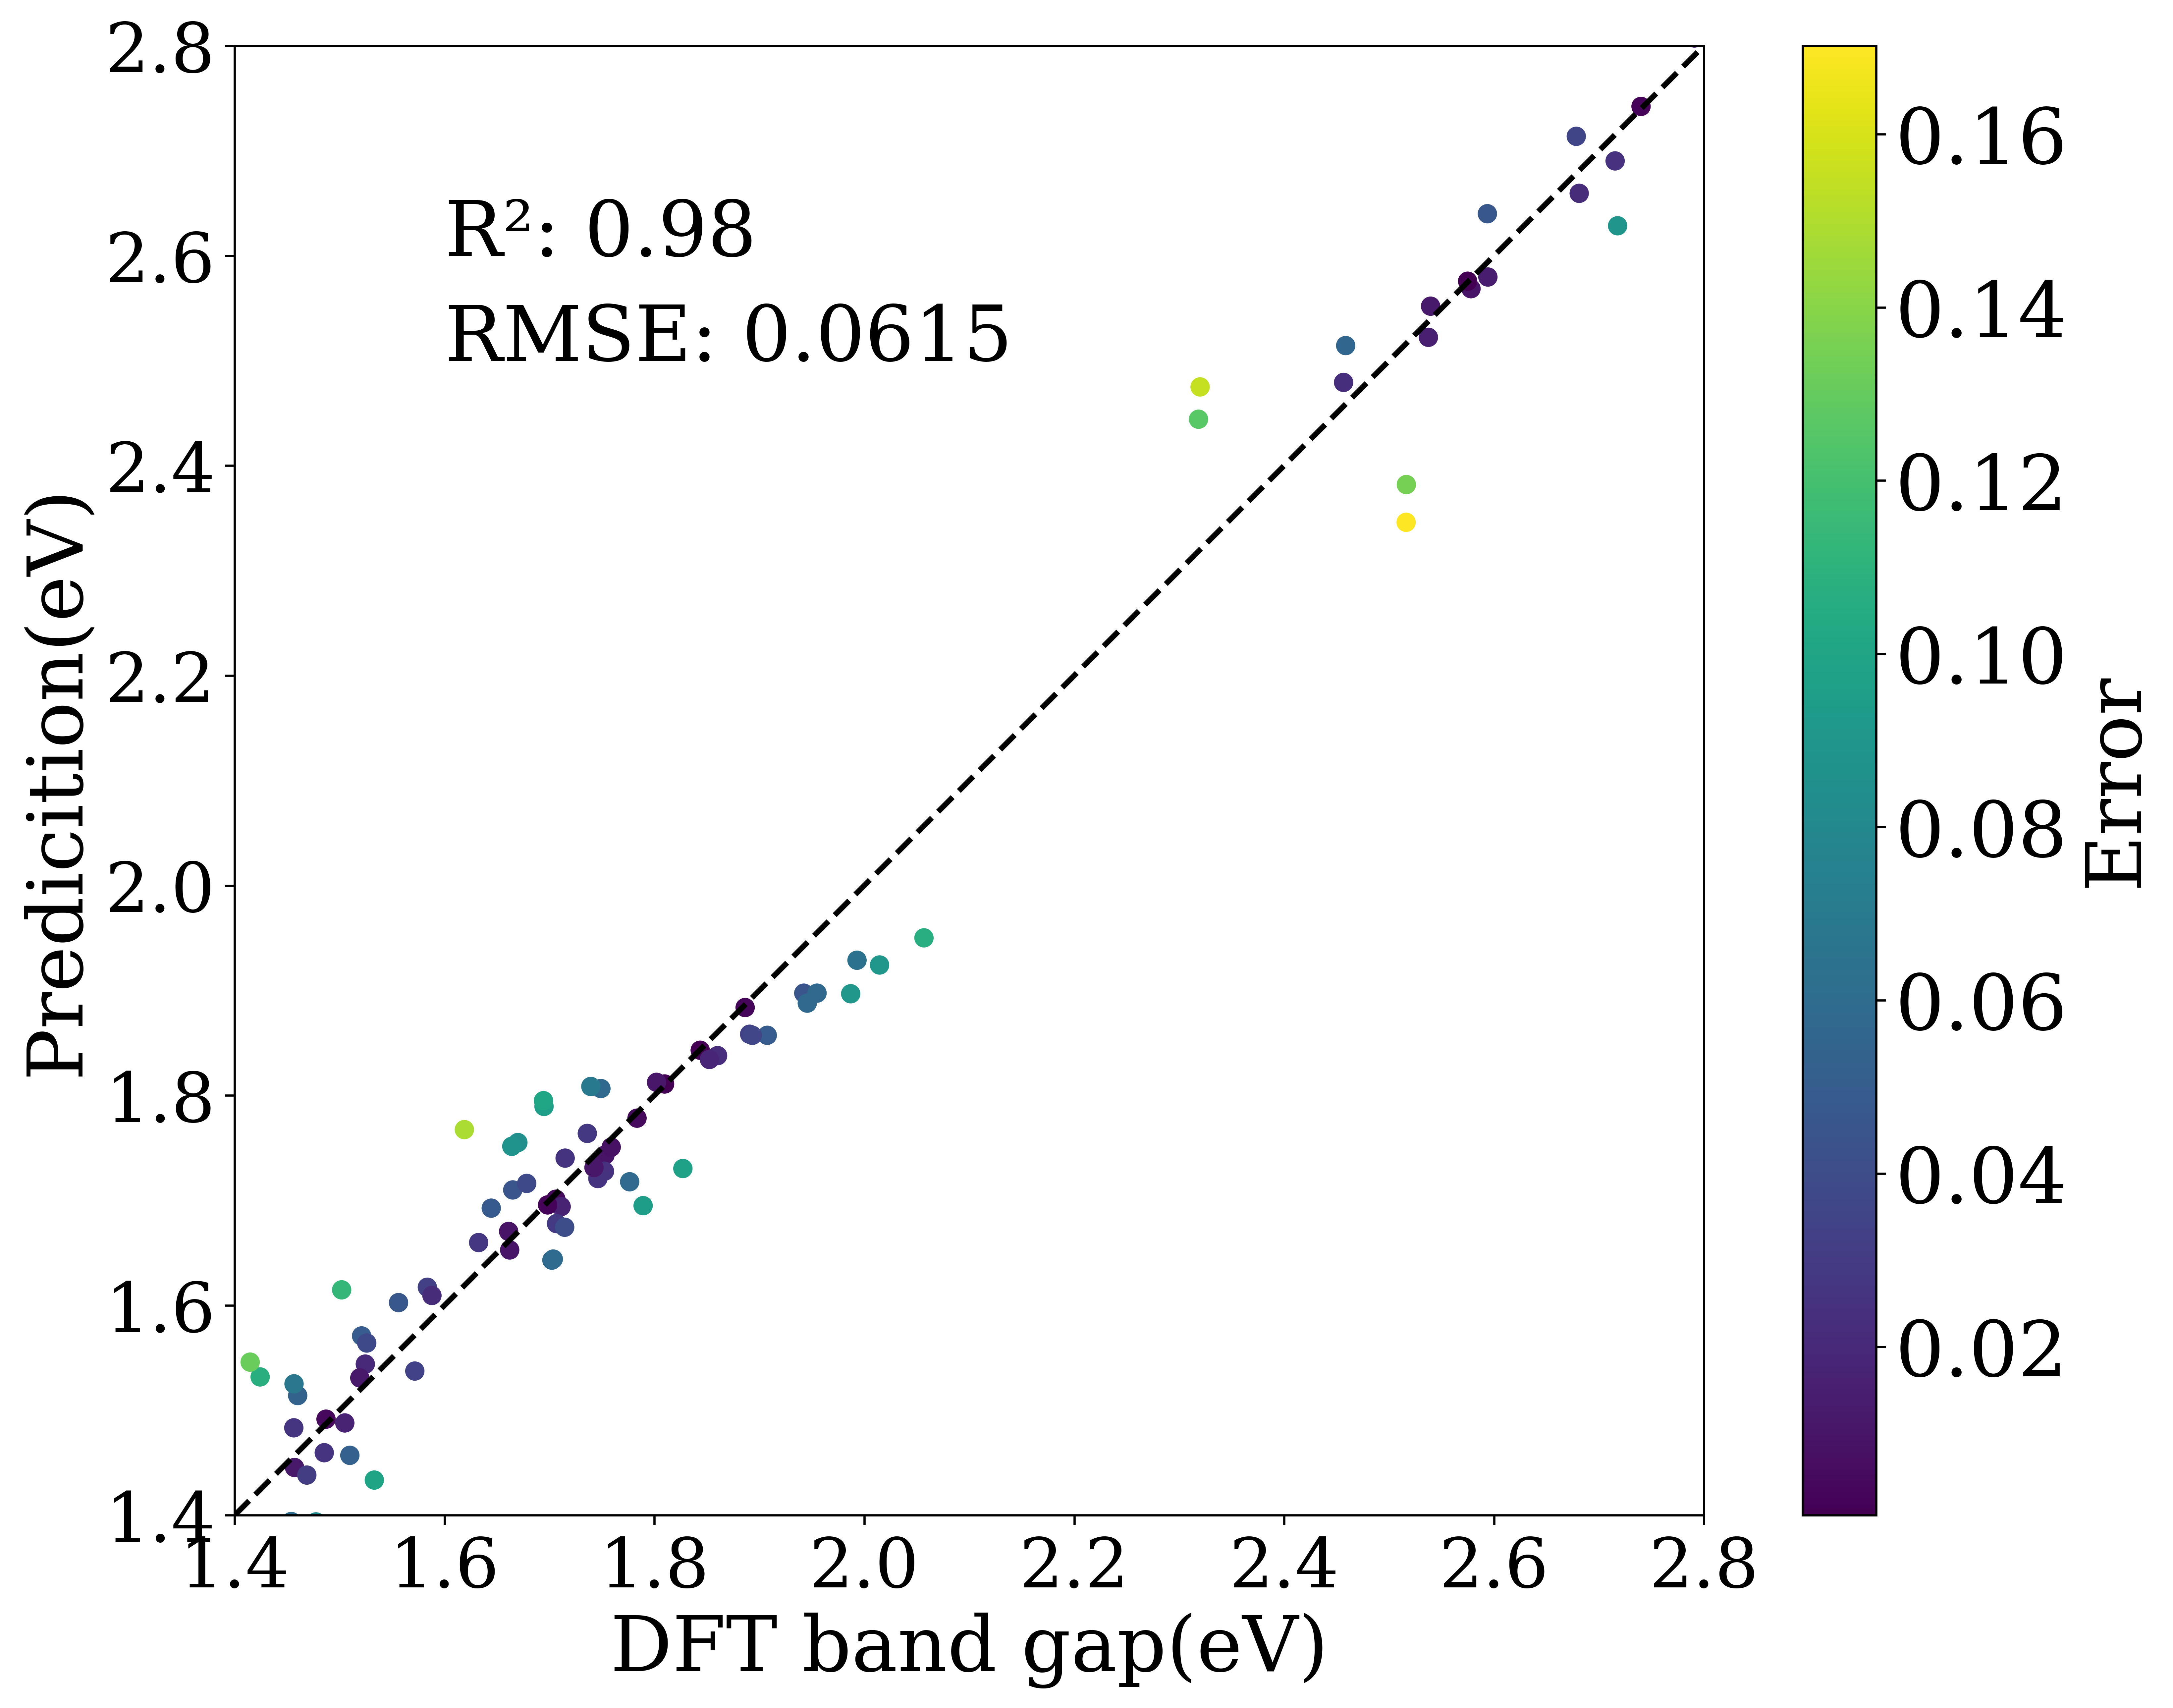

In [28]:
# 导入模块      
import matplotlib.pyplot as plt      
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    
  
# 先将列表转化为numpy数组      
DFT_bandgaps_np_ = np.array(DFT_bandgaps_train)      
predictions_np_ = np.array(predictions_train_)   
  
# 计算预测值和实际值之间的绝对误差    
distances = np.abs(DFT_bandgaps_np_ - predictions_np_)      
    
# 更改默认字体为DejaVu Serif    
plt.rcParams['font.family'] = 'DejaVu Serif'    
    
# 绘制图像    
fig = plt.figure(figsize=(12.8, 9.6),dpi = 600)    
plt.scatter(DFT_bandgaps_np_, predictions_np_, c=distances, cmap='viridis')  # 使用'viridis'颜色映射

# 添加颜色条
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=28) 
cbar.ax.set_ylabel('Error', fontsize=28)

# 添加参考线
plt.plot(np.linspace(1.4, 2.8, 100), np.linspace(1.4, 2.8, 100), linewidth=2, linestyle="--", color="black")    

# 设置x轴和y轴的范围
plt.xlim(1.4, 2.8)    
plt.ylim(1.4, 2.8)

# 设置x轴和y轴的刻度，字体大小为25

plt.xticks(fontsize=25)  
plt.yticks(fontsize=25)    

# 设置x轴和y轴的标签
plt.xlabel("DFT band gap(eV)", fontsize=28)    
plt.ylabel("Predicition(eV)", fontsize=28)    

# 强制将x轴和y轴的实际长度设置为相同的值
plt.gca().set_aspect('equal', adjustable='box')

# 设置均方根误差、平均绝对误差和R²的文本位置和字体大小
plt.text(1.6, 2.6, 'R²: {:.2f}'.format(r2_train), fontsize=28)  
plt.text(1.6, 2.5, 'RMSE: {:.4f}'.format(rmse_train), fontsize=28)  
#plt.text(-0.5, 0.3, 'MAE: {:.4f}'.format(mae), fontsize=16)  
  
# 在图上添加算法名称  
#plt.text(-0.5, 0.6, 'MEGNet', fontsize=16)  
plt.savefig('./photo/Megnet_Prediction_DFTbandgap_train.jpg',bbox_inches='tight')  
plt.show()  
plt.close()

In [35]:
!nvidia-smi

Mon Jan  1 15:23:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-32GB           On  | 00000000:00:08.0 Off |                    0 |
| N/A   31C    P0              35W / 300W |  31478MiB / 32768MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 测试集画图

In [19]:
with open("/root/home/jupyter/JupyterLab/bandgap-train/json/predicition_results_megnetGapTest.json", "r") as f:
    data_test1 = json.load(f)

In [20]:
len(data_test1)

18

In [21]:
structures_test = []
DFT_bandgaps_test = []

for item in data_test1:
    structure = Structure.from_dict(item['structure'])
    gap = item['DFT_bandgaps']
    structures_test.append(structure)
    DFT_bandgaps_test.append(gap)

In [22]:
len(structures_test)

18

In [23]:
len(DFT_bandgaps_test)

18

In [24]:
# 使用模型预测能带差
predictions_test = []
for structure in structures_test:
    prediction = model.predict_structure(structure)
    predictions_test.append(prediction)

In [25]:
predictions_test

[array([1.4515792], dtype=float32),
 array([1.9190297], dtype=float32),
 array([1.4385158], dtype=float32),
 array([1.7432283], dtype=float32),
 array([2.4232888], dtype=float32),
 array([1.5048441], dtype=float32),
 array([1.4154612], dtype=float32),
 array([1.5016885], dtype=float32),
 array([1.7938901], dtype=float32),
 array([2.381293], dtype=float32),
 array([1.8238872], dtype=float32),
 array([2.610109], dtype=float32),
 array([1.6384803], dtype=float32),
 array([1.6754032], dtype=float32),
 array([1.8325346], dtype=float32),
 array([2.7648735], dtype=float32),
 array([1.6757802], dtype=float32),
 array([1.7584338], dtype=float32)]

In [26]:
predictions_test_ = [pred[0].item() for pred in predictions_test]
predictions_test_

[1.451579213142395,
 1.919029712677002,
 1.4385157823562622,
 1.7432283163070679,
 2.4232888221740723,
 1.504844069480896,
 1.4154611825942993,
 1.5016884803771973,
 1.793890118598938,
 2.3812930583953857,
 1.8238872289657593,
 2.6101090908050537,
 1.638480305671692,
 1.6754032373428345,
 1.8325345516204834,
 2.764873504638672,
 1.675780177116394,
 1.7584338188171387]

In [27]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_test = np.sqrt(mean_squared_error(DFT_bandgaps_test, predictions_test_))
mae_test = mean_absolute_error(DFT_bandgaps_test, predictions_test_)
r2_test = r2_score(DFT_bandgaps_test, predictions_test_)

In [28]:
print(r2_test)
print(mae_test)
print(rmse_test)

0.9665689433394492
0.06105351378122962
0.0756913321967119


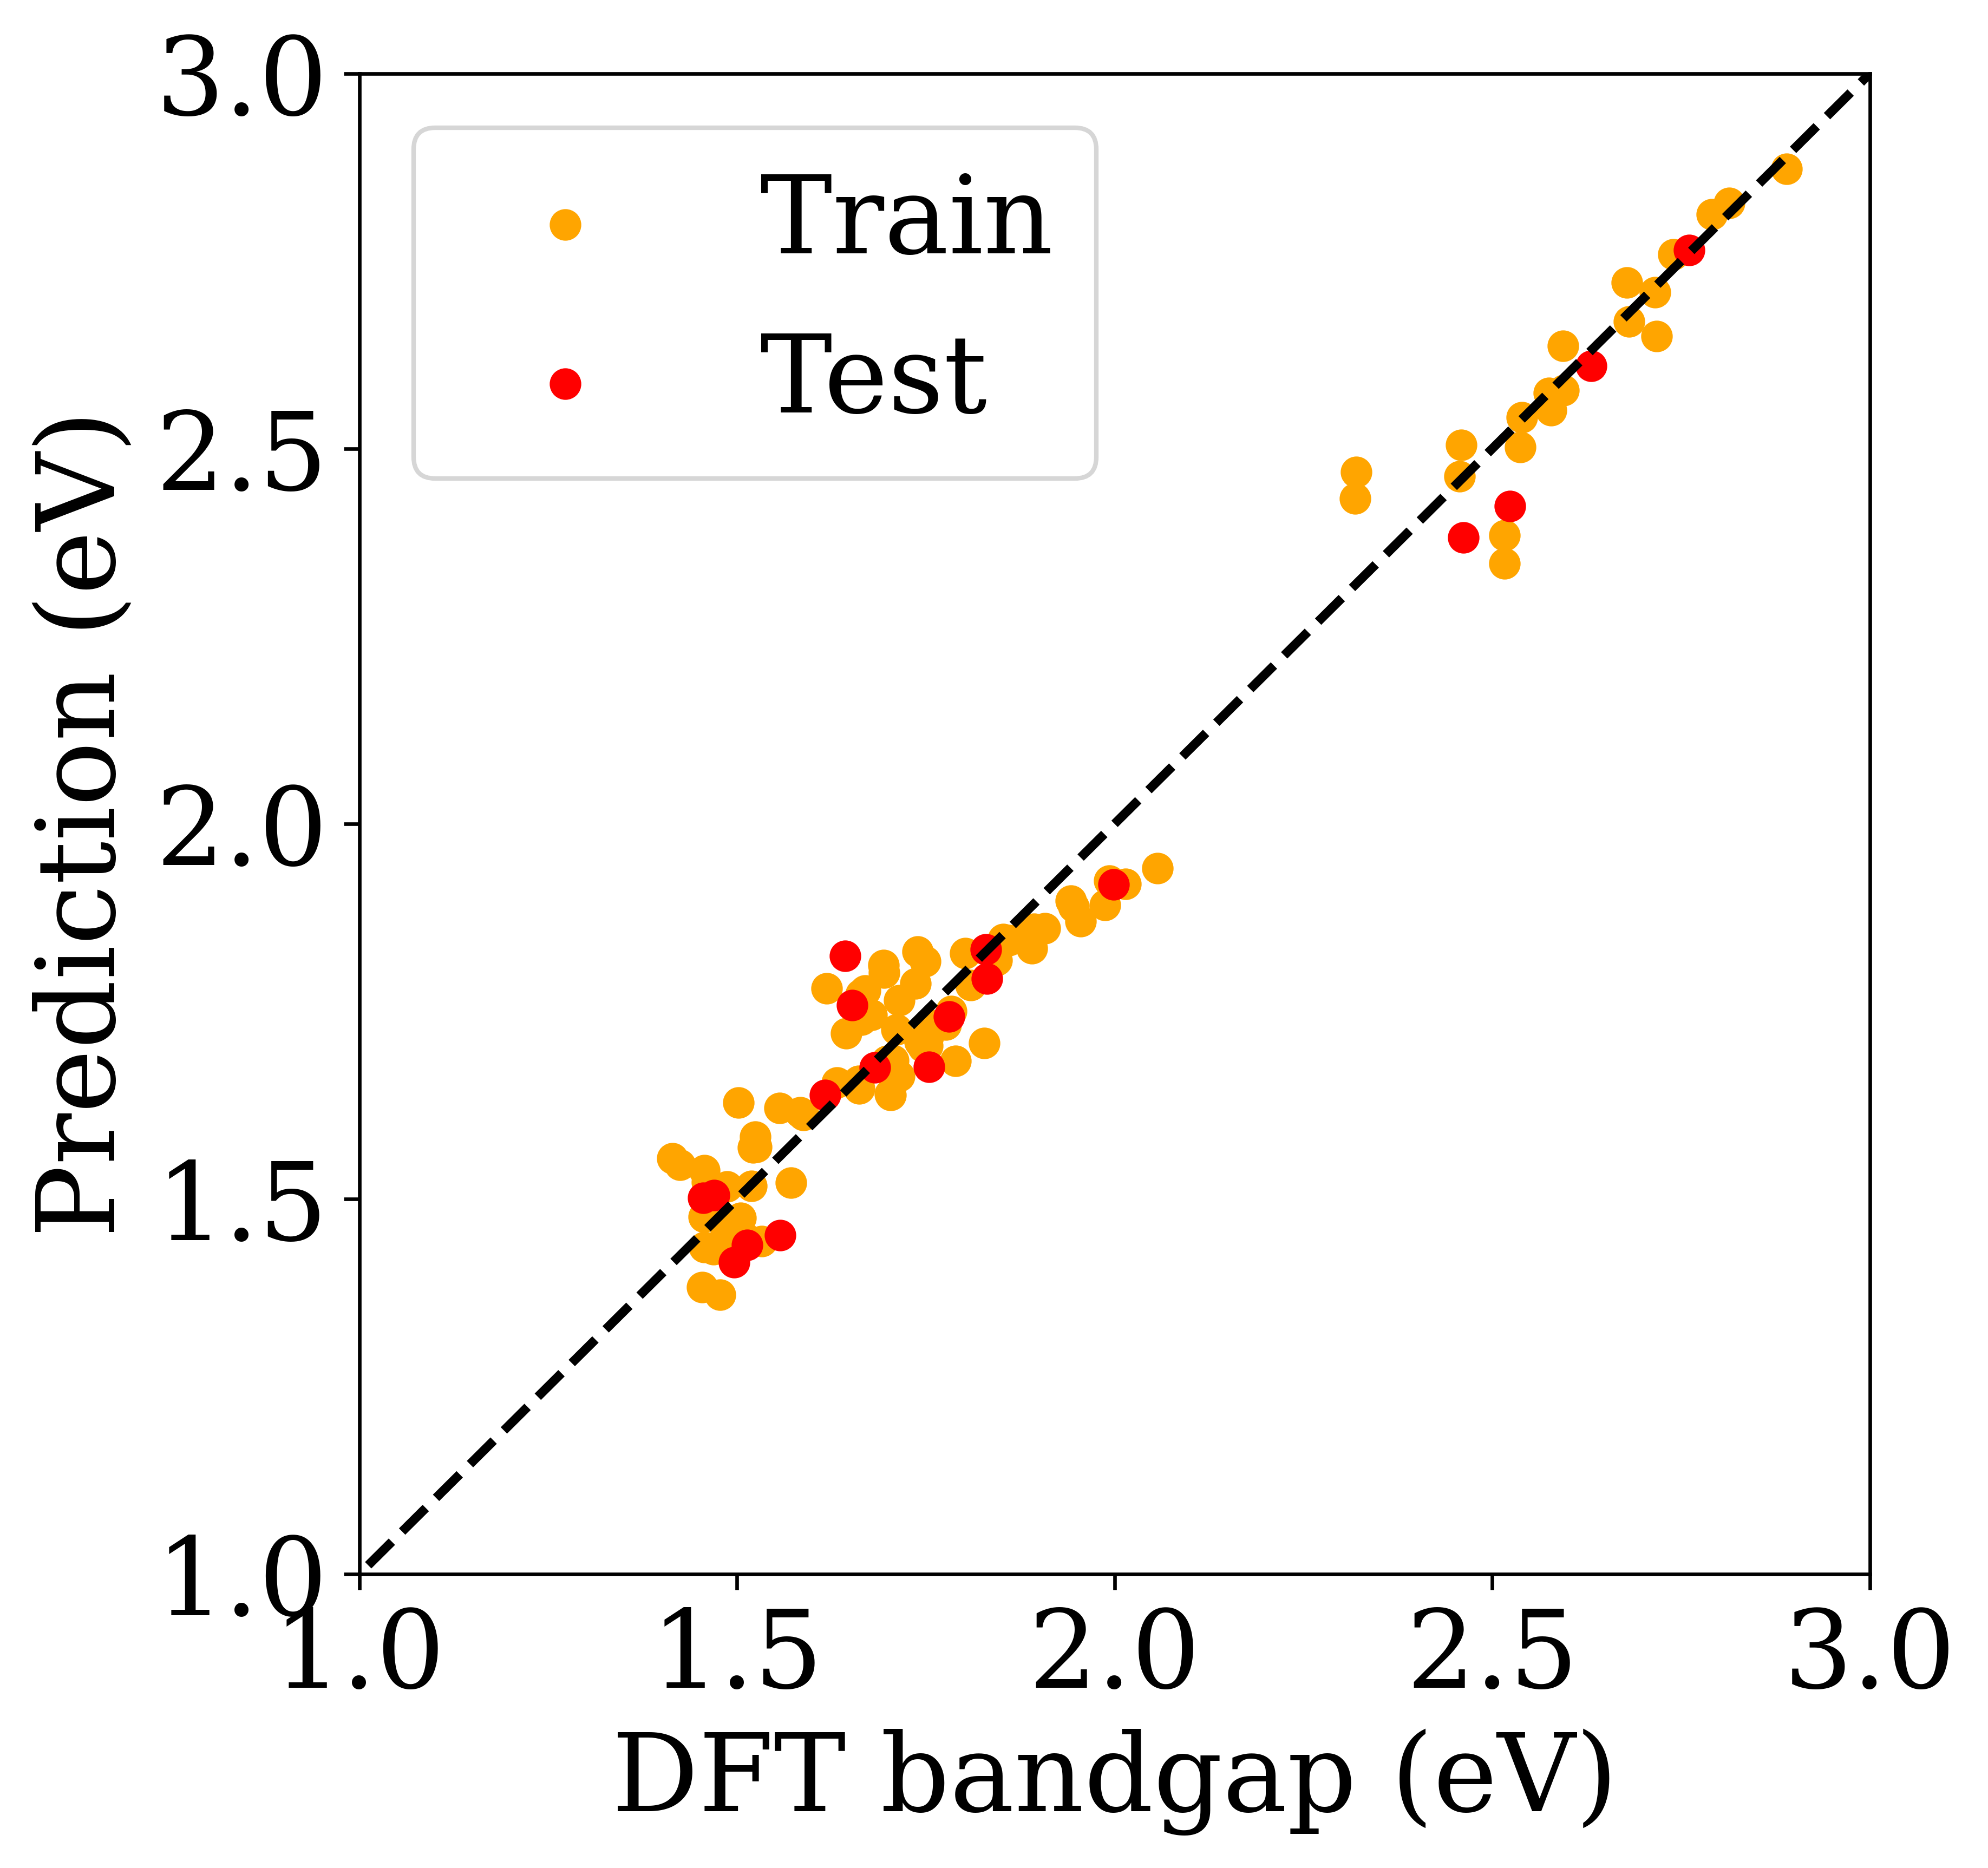

In [31]:
import numpy as np
import matplotlib.pyplot as plt   
plt.rcParams['font.family'] = 'DejaVu Serif'

# 绘制图像
fig = plt.figure(figsize=(6,6),dpi = 600)
plt.scatter(DFT_bandgaps_train, predictions_train_,c='orange',label='Train')
plt.scatter(DFT_bandgaps_test, predictions_test_,c='red',label = 'Test')
plt.plot(np.linspace(-1,6,100),np.linspace(-1,6,100),linewidth=2,linestyle="--",color="black")
plt.xlim((1.0,3))
plt.ylim((1.0,3))

plt.xticks(np.arange(1.0, 3.1, 0.5))  # 从1.0到3.0，步长为0.5  
plt.yticks(np.arange(1.0, 3.1, 0.5))  # 从1.0到3.0，步长为0.5 


plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("DFT bandgap (eV)",fontsize=24)
plt.ylabel("Prediction (eV)",fontsize=24)

plt.legend(loc='upper left', fontsize=24)  # 设置图例的位置和字体大小    

# 在图上添加均方根误差和R²
#plt.text(1.22, 2.5, 'R²: {:.2f}'.format(r2_test-0.05), fontsize=18)
#plt.text(1.22, 2.4, 'RMSE: {:.4f}'.format(rmse_test), fontsize=18)
# 在图上添加算法名称
#plt.text(2.5, 1.3, 'Megnet', fontsize=18)
plt.savefig('./photo/Megnet_DFTbandgap2.png',dpi=600, bbox_inches='tight')

plt.show()
plt.close()

In [34]:
import pandas as pd
# 创建一个DataFrame来存储训练数据  
train_data = pd.DataFrame({  
    'DFT_bandgaps': DFT_bandgaps_train,  
    'Predictions': predictions_train_  
})  
  
# 创建一个DataFrame来存储测试数据  
test_data = pd.DataFrame({  
    'DFT_bandgaps': DFT_bandgaps_test,  
    'Predictions': predictions_test_  
})  
  
# 你可以将两个数据集合并，也可以分别保存它们  
# 这里我们分别保存它们为CSV文件  
train_data.to_csv('./excel/train_data_DFTbandgap.csv', index=False)  # index=False表示不保存行索引  
test_data.to_csv('./excel/test_data_DFTbandgap.csv', index=False)  # 同上  

# 存储

In [46]:
#训练集

In [47]:
len(structures_train)

90

In [49]:
len(DFT_bandgaps_train)

90

In [50]:
len(predictions_train_)

90

In [51]:
# 创建一个列表来存储结果数据  
results_train = []  
  
# 遍历测试集的结构和预测gaps值，以及提取的DFT带隙值和真实gap值  
for structure, prediction, in zip(structures_train, predictions_train_):  
    # 创建一个字典来存储当前结构的数据  
    item = {}  
    item['structure'] = structure.as_dict()  # 将Structure对象转换为字典  
     
    item['prediction_DFTgaps'] = prediction  # 直接使用预测bandgaps值，因为它已经是一个浮点数了  
    
    results_train.append(item)  

print(len(results_train))

90


In [52]:
import json  
  
# 将结果列表转换为JSON格式  
results_train_json = json.dumps(results_train)  
  
# 将JSON数据写入文件  
with open('./json/predicition_DFTBandgap_megnetTrain.json', 'w') as file:  
    file.write(results_train_json)

In [59]:
import pandas as pd  
  
# 创建一个空的列表来存储化学式  
formulas_train = []  
  
# 遍历结果列表  
for result in results_train:  
    # 从结构对象中提取化学式  
    structure = Structure.from_dict(result['structure']) 
    formula = structure.formula
    formulas_train.append(formula)  
    
    
    
ddd = pd.DataFrame(results_train)  
  
# 添加化学式作为新的一列  
ddd['Formula'] = formulas_train  
  
# 重命名列名  
ddd.columns = ['Structure', 'Predicted_DFTbandgaps','Formula']  
  
# 将数据帧写入CSV文件  
ddd

,Structure,Predicted_DFTbandgaps,Formula
0,"{'@module': 'pymatgen.core.structure', '@class...",1.743196,H18 Pb3 C3 I5 Br4 N3
1,"{'@module': 'pymatgen.core.structure', '@class...",1.701125,H18 Pb3 C3 I7 Br2 N3
2,"{'@module': 'pymatgen.core.structure', '@class...",1.694967,H15 Pb3 C3 I3 Br6 N6
3,"{'@module': 'pymatgen.core.structure', '@class...",1.897431,H22 Pb4 C4 Br12 N6
4,"{'@module': 'pymatgen.core.structure', '@class...",2.381961,Cs4 Pb4 I11 Br1
...,...,...,...
85,"{'@module': 'pymatgen.core.structure', '@class...",2.690300,Cs4 Pb4 I3 Br9
86,"{'@module': 'pymatgen.core.structure', '@class...",1.750723,H18 Pb3 C3 I5 Br4 N3
87,"{'@module': 'pymatgen.core.structure', '@class...",1.720788,H15 Pb3 C3 I1 Br8 N6
88,"{'@module': 'pymatgen.core.structure', '@class...",1.731273,H18 Pb3 C3 I6 Br3 N3


In [60]:
ddd.to_csv('./excel/PredicitionMegnetDFTBandgap_train.csv',index = False)

In [53]:
#test

In [54]:
len(structures_test)

18

In [55]:
len(predictions_test_)

18

In [56]:
# 创建一个列表来存储结果数据  
results_test = []  
  
# 遍历测试集的结构和预测gaps值，以及提取的DFT带隙值和真实gap值  
for structure, prediction, in zip(structures_test, predictions_test_):  
    # 创建一个字典来存储当前结构的数据  
    item = {}  
    item['structure'] = structure.as_dict()  # 将Structure对象转换为字典  
     
    item['prediction_DFTgaps'] = prediction  # 直接使用预测bandgaps值，因为它已经是一个浮点数了  
    
    results_test.append(item)  

print(len(results_test))

18


In [57]:
import json  
  
# 将结果列表转换为JSON格式  
results_test_json = json.dumps(results_test)  
  
# 将JSON数据写入文件  
with open('./json/predicition_DFTBandgap_megnetTest.json', 'w') as file:  
    file.write(results_test_json)

In [61]:
import pandas as pd  
  
# 创建一个空的列表来存储化学式  
formulas = []  
  
# 遍历结果列表  
for result in results_test:  
    # 从结构对象中提取化学式  
    structure = Structure.from_dict(result['structure']) 
    formula = structure.formula
    formulas.append(formula)  
    
    
    
df = pd.DataFrame(results_test)  
  
# 添加化学式作为新的一列  
df['Formula'] = formulas  
  
# 重命名列名  
df.columns = ['Structure', 'Predicted_bandgaps','Formula']  
  
# 将数据帧写入CSV文件  
df

,Structure,Predicted_bandgaps,Formula
0,"{'@module': 'pymatgen.core.structure', '@class...",1.430975,Cs3 Pb3 I8 Br1
1,"{'@module': 'pymatgen.core.structure', '@class...",1.731273,H18 Pb3 C3 I6 Br3 N3
2,"{'@module': 'pymatgen.core.structure', '@class...",1.495114,Cs3 Pb3 I5 Br4
3,"{'@module': 'pymatgen.core.structure', '@class...",2.568543,Cs4 Pb4 I7 Br5
4,"{'@module': 'pymatgen.core.structure', '@class...",1.834249,H24 Pb4 C4 I4 Br8 N4
5,"{'@module': 'pymatgen.core.structure', '@class...",1.484014,Cs3 Pb3 I4 Br5
6,"{'@module': 'pymatgen.core.structure', '@class...",1.690871,H18 Pb3 C3 I7 Br2 N3
7,"{'@module': 'pymatgen.core.structure', '@class...",1.531812,Cs3 Pb3 I3 Br6
8,"{'@module': 'pymatgen.core.structure', '@class...",1.821362,H24 Pb4 C4 I5 Br7 N4
9,"{'@module': 'pymatgen.core.structure', '@class...",1.750723,H18 Pb3 C3 I5 Br4 N3


In [62]:
df.to_csv('./excel/PredicitionMegnetDFTBandgap_test.csv',index = False)